# Surface map
This notebook helps make nice looking surface plots 

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
import cmocean as cm
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import xarray as xr

# load data
file is the netcdf of the simulation output

In [2]:
file = "/home/ljg48/palmer_scratch/climaocean/test-release_2025-02-26.nc"
ds = xr.open_dataset(file)

In [3]:
# simple land mask
mask = ds['S'].squeeze().isel(time=0)>0

# Plot surface concentration

Text(0.7, 0.95, 'Day: 30')

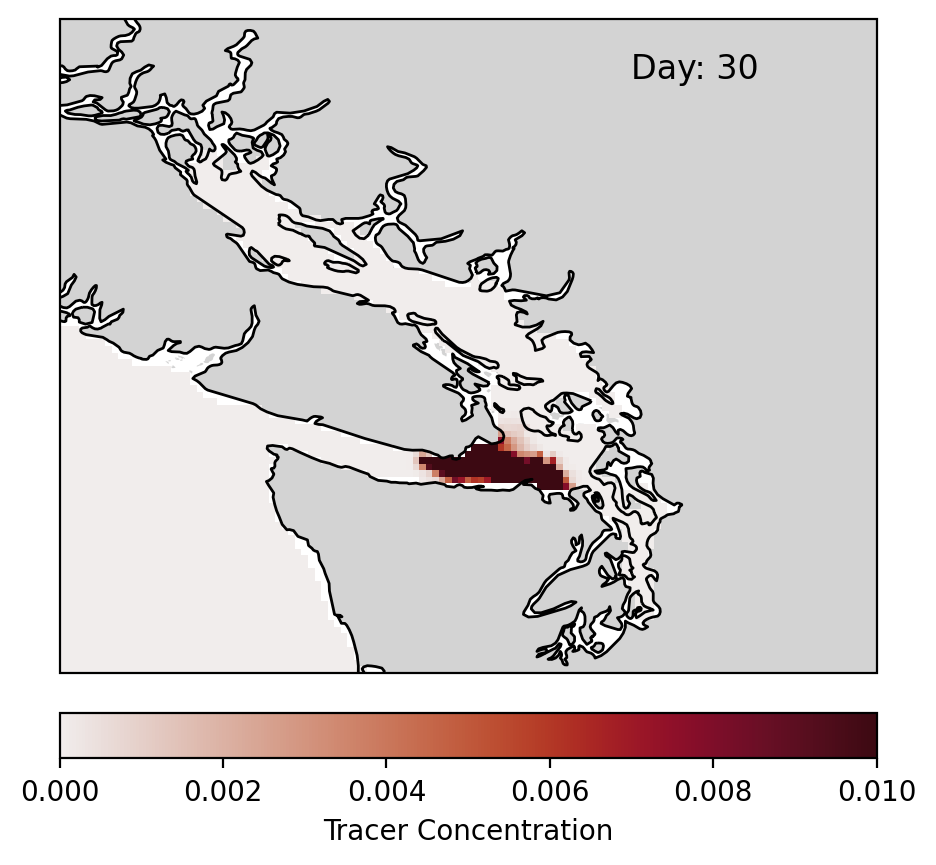

In [4]:
fig = plt.figure(dpi=200)

# ========================================================================
# variables / settings
# ========================================================================    
# sets plot index (useful when have subplots)
ind = 0 

# the day do you want to plot
# this assumes simulation output is in days
day = 30 

# variable to plot
# * 'c' is tracer
# * 'T' is temperature
# * 'S' is salinity
variable = 'c'

#
# colormap settings
# cmaps: 
# * cm.cm.amp     --> good for tracer (c)
# * cm.cm.thermal --> good for temp (T)
# * cm.cm.haline  --> good for salinity (S)

cmap = cm.cm.amp

# colormap range
vmin = 0      # min color
vmax = 0.01     # max color 

ncolors=101 # number of colors to plot

col_title = 'Tracer Concentration' # title on colorbar

# ========================================================================
# setup plotting grid
# Creates a zoomed-in grid around Port Angeles, Washington
# ========================================================================
extent = [234-360, 239-360, 47, 51]

projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(projection=projection))

grid_params = {
    'rect': [1, 1, 1],          # Specifies the location of the grid
    'axes_class': axes_class,  
    'share_all': False,         # x-axis & y-axis of all axes are shared if True
    'nrows_ncols': (1, 1),      # Number of rows and cols, e.g., (2,2)
    "ngrids": None,             # Number of grids, nrows x ncols if None
    "direction": "row",         # Increasing direction of axes number [row|column]
    'axes_pad': 0.1,            # Pad between axes in inches
    'cbar_location': 'bottom',  # [left|right|top|bottom]
    'cbar_mode': 'single',      # [None|single|each]
    'cbar_pad': 0.1,            # Pad between image axes and colorbar axes
    'cbar_size': '7%',          # Size of the colorbar
}
    
grid = AxesGrid(fig, **grid_params) 

# Set extent for each subplot
for ax in grid:
    ax.set_extent(extent, crs=ccrs.PlateCarree())  # Zoom into Port Angeles area
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    #ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# ========================================================================
# process data
# ========================================================================
# simple land mask
mask = ds['S'].squeeze().isel(time=0)>0

# concentration at selected day
data = ds[variable].sel(time=ds["time"][day]).where(mask).squeeze()

# ========================================================================
# plot data
# ========================================================================
bounds = np.linspace(vmin, vmax, ncolors) 
plot_params = {
    "cmap": cmap,
    'transform':ccrs.PlateCarree(central_longitude=0),
    "vmin": vmin,
    "vmax": vmax,
}

transform = ccrs.PlateCarree(central_longitude=0) 
sub = grid[ind].pcolormesh(data.xC, data.yC, data, **plot_params)

# ========================================================================
# add colorbar
# ========================================================================
bounds = np.linspace(vmin, vmax, ncolors) 
colormap_params = {
    'orientation':'horizontal',
    'cmap': cmap,
    "norm": mpl.colors.Normalize(vmin=vmin, vmax=vmax),
    #"norm": mpl.colors.BoundaryNorm(bounds, ncolors),
    'extend': None
}

col = mpl.colorbar.ColorbarBase(grid.cbar_axes[0], **colormap_params)
col.ax.set_xlabel(col_title)

# ========================================================================
# annotations
# ========================================================================
grid[ind].text(0.7, 0.95, 
    f'Day: {day}', 
    transform=grid[ind].transAxes,
    fontsize=12, 
    verticalalignment='top', 
    horizontalalignment='left'
)